In [1]:
from __future__ import print_function
import numpy as np
import cv2

In [6]:
### CAPTURE VIDEO
cam = cv2.VideoCapture(0)
ret, img = cam.read()
cv2.destroyAllWindows() 
cam.release()

In [7]:
from matplotlib.pyplot import imshow
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = (12, 8)

In [8]:
%matplotlib inline

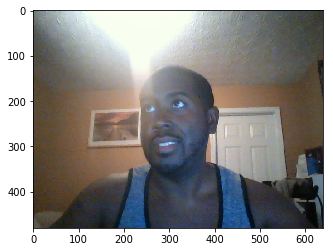

In [9]:
imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [66]:
import requests

In [67]:
import PIL

In [68]:
from io import BytesIO

In [71]:
f = BytesIO()
PIL.Image.fromarray(img).save(f, 'png')
data = f.getvalue()

In [72]:
API_KEY = 'a5c7647eaf834e1e9ed633938658fffe'

In [73]:
endpoint = 'https://westcentralus.api.cognitive.microsoft.com/face/v1.0/detect'
args = {'returnFaceId': 'true',
        'returnFaceLandmarks': 'false',
        'returnFaceAttributes': 'age,gender,emotion'}
headers = {'Content-Type': 'application/octet-stream',
           'Ocp-Apim-Subscription-Key': API_KEY}

In [74]:
response = requests.post(data=data,url=endpoint,headers=headers,params=args)

In [75]:
response

<Response [200]>

In [76]:
response.json()

[{'faceId': '994f24b3-64ed-4301-87d7-e23626746009',
  'faceRectangle': {'top': 189, 'left': 272, 'width': 184, 'height': 184},
  'faceAttributes': {'gender': 'male',
   'age': 34.0,
   'emotion': {'anger': 0.189,
    'contempt': 0.008,
    'disgust': 0.008,
    'fear': 0.0,
    'happiness': 0.0,
    'neutral': 0.783,
    'sadness': 0.011,
    'surprise': 0.0}}}]

In [77]:
from matplotlib.patches import Polygon
from matplotlib.pyplot import gcf, gca

{'gender': 'male', 'age': 34.0, 'anger': 0.189, 'contempt': 0.008, 'disgust': 0.008, 'fear': 0.0, 'happiness': 0.0, 'neutral': 0.783, 'sadness': 0.011, 'surprise': 0.0}


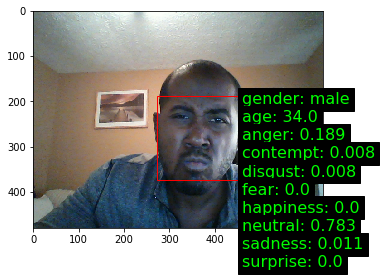

In [78]:
ax = imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
for face in response.json():
    rect = face['faceRectangle']
    fattr = face['faceAttributes']
    left, top, width, height = rect['left'], rect['top'], rect['width'], rect['height']
    path = [[left, top], [left + width, top], 
            [left + width, top + height], [left, top + height]]
    ax.axes.add_patch(Polygon(path, edgecolor='red', facecolor='none'))
    disp = {'gender': fattr['gender'],
                 'age': fattr['age']}
    disp.update(fattr['emotion'])
    print(disp)
    for i, k in enumerate(disp):
        ax.axes.text(left+width+5, top + 16 + 40*i, "{0}: {1}".format(k, disp[k]),
                     color='lime', fontsize=16, backgroundcolor='black')